In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="HEahJQQH3MHFebLYeGB8")
project = rf.workspace("asas-xloki").project("227-yc1vm")
version = project.version(1)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 227-1 in folder:: 100%|██████████| 6755/6755 [00:02<00:00, 3346.98it/s]


In [4]:
image_size=256
batch_size = 28

In [5]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/227-1/train",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 4531 files belonging to 28 classes.


In [6]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/227-1/valid",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 1468 files belonging to 28 classes.


In [7]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/227-1/test",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 667 files belonging to 28 classes.


In [8]:
classes_name=train_ds.class_names
classes_name

['Bush Clock Vine',
 'Common Lanthana',
 'Datura',
 'Hibiscus',
 'Jatropha',
 'Marigold',
 'Nityakalyani',
 'Rose',
 'Yellow_Daisy',
 'adathoda',
 'banana',
 'champaka',
 'chitrak',
 'crown flower',
 "four o'clock flower",
 'honeysuckle',
 'indian mallow',
 'malabar melastome',
 'nagapoovu',
 'pinwheel flower',
 'shankupushpam',
 'spider lily',
 'sunflower',
 'thechi',
 'thumba',
 'touch me not',
 'tridax procumbens',
 'wild_potato_vine']

In [9]:
len(train_ds)

162

In [10]:
162*28

4536

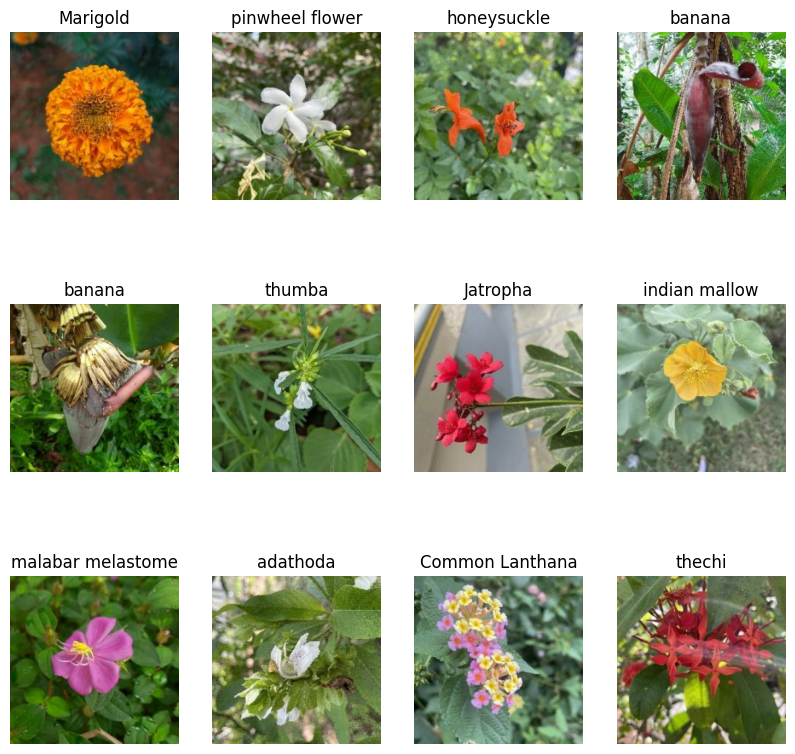

In [11]:
plt.figure(figsize=(10,10))
for image_batc,lable_batch in train_ds.take(1):
  for i in range(12):
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batc[i].numpy().astype("uint8"))
       plt.title(classes_name[lable_batch[i]])
       plt.axis("off")

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size),
    layers.Rescaling(1.0 / 255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [15]:
imput_shape=(batch_size,image_size,image_size,3)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=imput_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(28,activation="softmax")
])
model.build(input_shape=imput_shape)

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (28, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (28, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (28, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (28, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (28, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (28, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (28, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (28, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (28, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (28, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (28, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (28, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (28, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (28, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (28, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (28, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (28, 28)                    │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,372 (724.11 KB)

 Trainable params: 185,372 (724.11 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [19]:
history=model.fit(train_ds,epochs=40,batch_size=batch_size,verbose=1,validation_data=val_ds)

Epoch 1/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.1210 - loss: 2.9611 - val_accuracy: 0.4005 - val_loss: 1.9101
Epoch 2/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4184 - loss: 1.7661 - val_accuracy: 0.6029 - val_loss: 1.2712
Epoch 3/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5956 - loss: 1.2368 - val_accuracy: 0.6315 - val_loss: 1.1071
Epoch 4/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6461 - loss: 1.0524 - val_accuracy: 0.7221 - val_loss: 0.8414
Epoch 5/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.7408 - loss: 0.8014 - val_accuracy: 0.7330 - val_loss: 0.7857
Epoch 6/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7780 - loss: 0.6543 - val_accuracy: 0.7956 - val_loss: 0.6277
Epoch 7/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.7818 - loss: 0.6556 - val_accuracy: 0.7916 - val_loss: 0.6160
Epoch 8/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.8096 - loss: 0.5481 - val_a

In [20]:
score=model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9625 - loss: 0.1435


In [21]:
score

[0.1722765564918518, 0.947526216506958]

In [22]:
history

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss=history.history["loss"]
val_loss=history.history["val_loss"]

Text(0.5, 1.0, 'Training and Validation Accuracy')

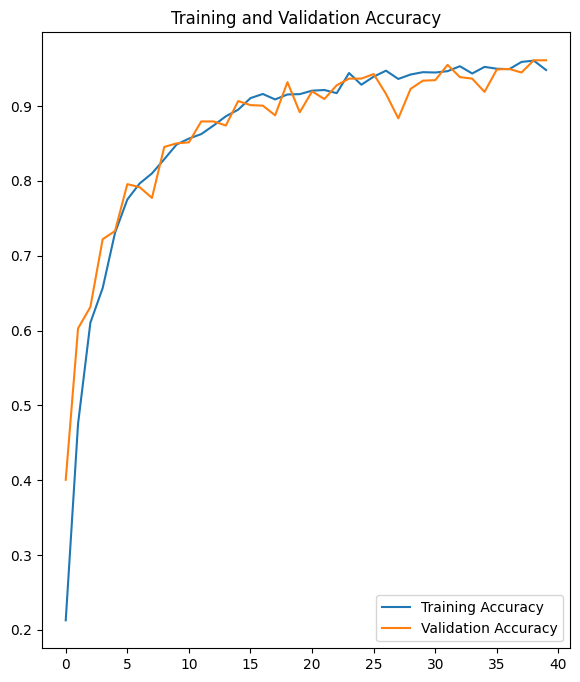

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(len(acc)),acc,label="Training Accuracy")
plt.plot(range(len(val_acc)),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

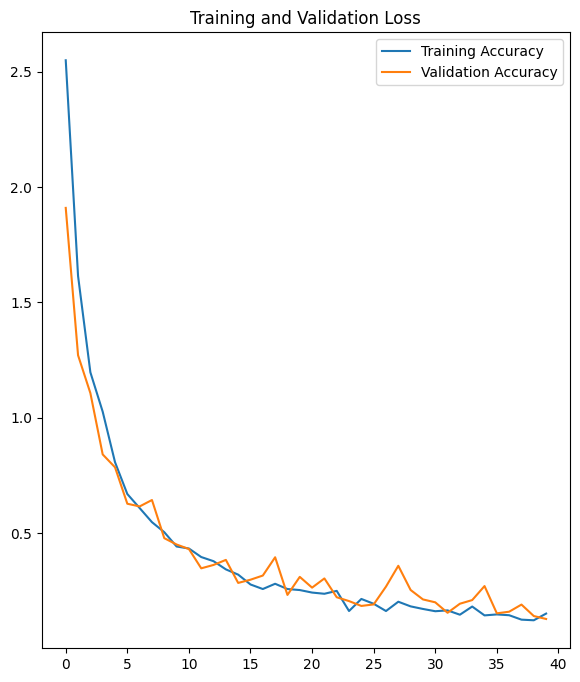

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(len(acc)),loss,label="Training Accuracy")
plt.plot(range(len(val_acc)),val_loss,label="Validation Accuracy")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

first image to predict
actual label: honeysuckle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
predicted label: honeysuckle


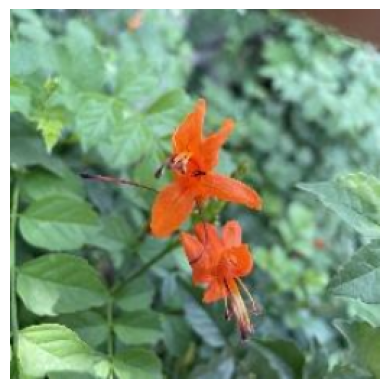

In [27]:
for image_batc,lable_batch in test_ds.take(1):
  first_image=image_batc[0].numpy().astype("uint8")
  first_label=lable_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  plt.axis("off")
  print("actual label:",classes_name[first_label])

  batch_prediction=model.predict(image_batc)
  print("predicted label:",classes_name[np.argmax(batch_prediction[0])])

In [28]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=classes_name[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


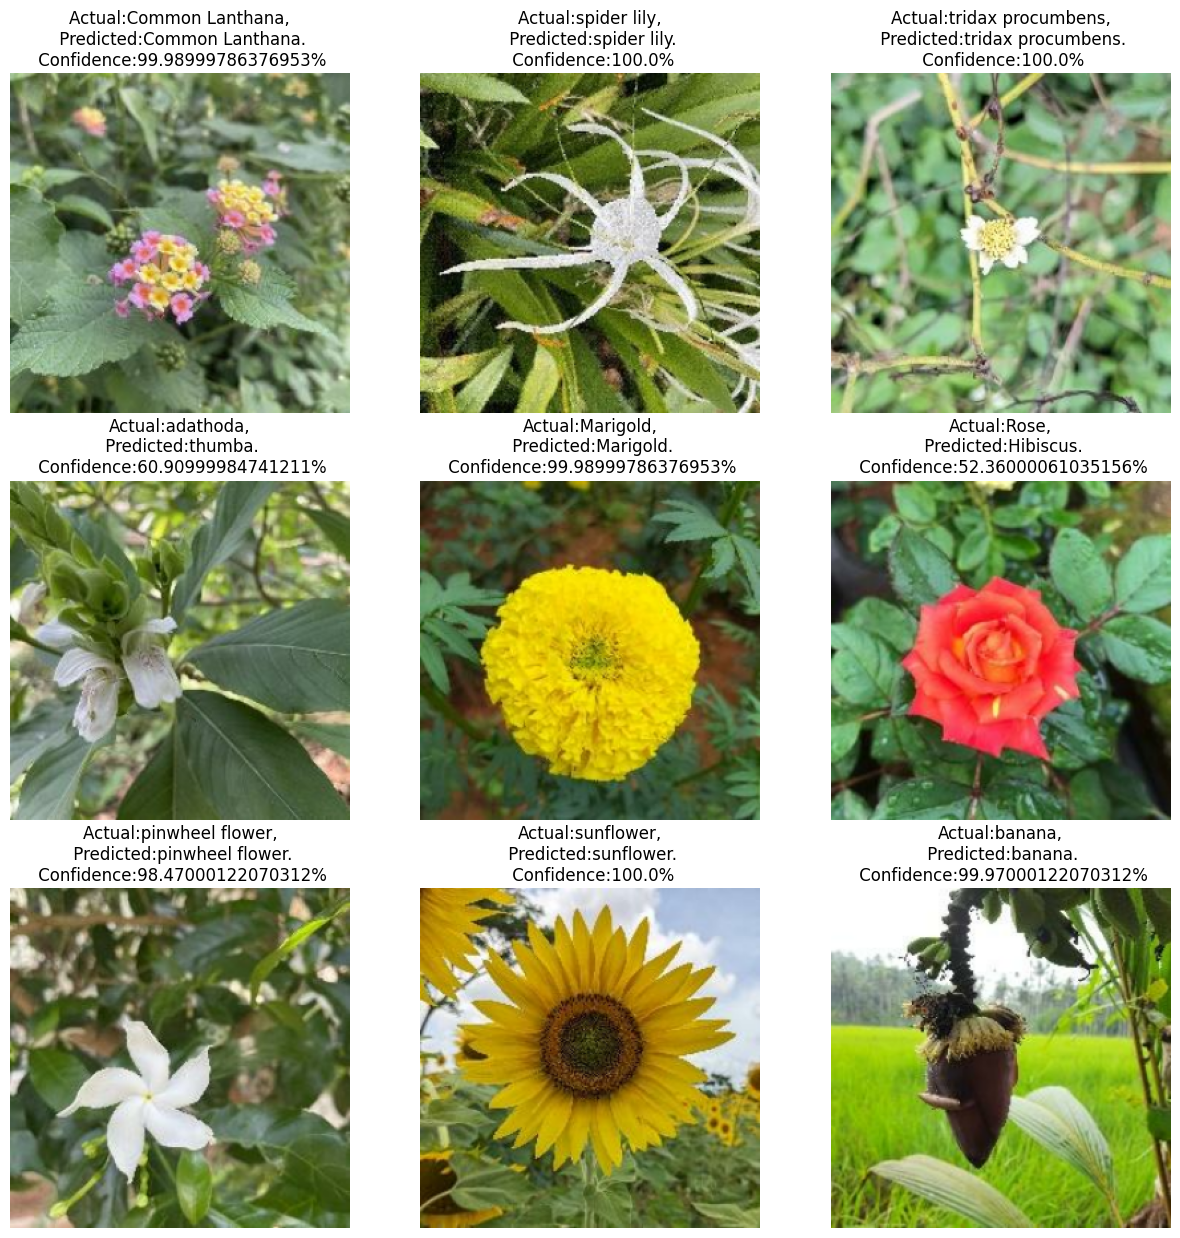

In [29]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=classes_name[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

In [30]:
!pip install -q pyyaml h5py

In [31]:
!mkdir -p saved_model


In [32]:
model.save('/content/saved_model/model_n.keras')

In [33]:
import tensorflow as tf

# Load the model
loaded_model = tf.keras.models.load_model('/content/saved_model/model_n.keras')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


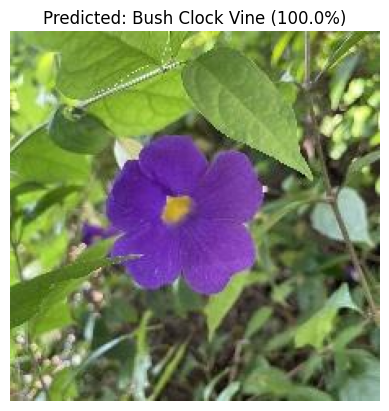

In [38]:
image_path = "/content/227-1/test/Bush Clock Vine/Bush_Clock_Vine100_jpg.rf.0acb3922bce6bf1ff0ee68243d216976.jpg"
image = tf.keras.preprocessing.image.load_img(image_path)

    # Convert to tensor (still dtype=uint8)
image = tf.keras.preprocessing.image.img_to_array(image)

    # Convert to float32 for model input
image = tf.cast(image, tf.float32)

    # Add batch dimension
image = tf.expand_dims(image, 0)

    # Predict
prediction = loaded_model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_class_name = classes_name[predicted_class]
confidence = round(100 * np.max(prediction[0]), 2)

    # Plot
plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
plt.title(f"Predicted: {predicted_class_name} ({confidence}%)")
plt.axis("off")
plt.show()

In [39]:
print(tf.__version__)

2.18.0
